In [1]:
#boot up libraries
import pandas as pd
from sklearn import preprocessing

In [2]:
#load up full csv
df = pd.read_csv("cleaned_data/complete_merged_table.csv")

In [3]:
df

,County,Year,Total_Population,Median_Income,White_Perc,Poverty_Perc,Uninsured_Perc,Asthma_Incidents,Asthma_Rate,Acres_Burned,Duration,Wildfire_Count,AQ_Min,AQ_Max,AQ_Mean,AQ_Median
0,Alameda,2011,1656754.0,43583.0,0.314137,0.097529,0.037430,6706,56.6,0.0,0,0.0,1.0,135.0,36.061303,33.0
1,Alameda,2012,1656754.0,43583.0,0.314137,0.097529,0.037430,6965,58.4,0.0,0,0.0,0.0,96.0,31.979620,30.0
2,Alameda,2013,1656754.0,43583.0,0.314137,0.097529,0.037430,6705,55.0,478.0,0,4.0,0.0,119.0,40.067273,38.0
3,Alameda,2014,1656754.0,43583.0,0.314137,0.097529,0.037430,6332,51.6,0.0,0,0.0,0.0,119.0,33.979899,31.0
4,Alameda,2015,1656754.0,43583.0,0.314137,0.097529,0.037430,6513,53.1,3340.0,5,5.0,0.0,124.0,36.424754,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,Yuba,2015,76360.0,27877.0,0.551925,0.151545,0.060071,215,39.5,188.0,6,2.0,NaN,NaN,NaN,NaN
375,Yuba,2016,76360.0,27877.0,0.551925,0.151545,0.060071,202,37.7,400.0,0,1.0,NaN,NaN,NaN,NaN
376,Yuba,2017,76360.0,27877.0,0.551925,0.151545,0.060071,245,45.1,10981.0,950,6.0,NaN,NaN,NaN,NaN
377,Yuba,2018,76360.0,27877.0,0.551925,0.151545,0.060071,227,40.8,0.0,0,0.0,NaN,NaN,NaN,NaN


## Trying it with crosstabs

The crosstabs function wouldn't make sense because it only measures frequency.

In [4]:
def API_index(df):
    for x in range(len(df)):
        if df.iloc[x,13] < 50:
            df.loc[x, 'max_aq_index'] = 'good'
        elif 51 < df.iloc[x,13] < 100:
            df.loc[x, 'max_aq_index'] = 'moderate'
        elif 101 < df.iloc[x,13] < 150:
            df.loc[x, 'max_aq_index'] = 'unhealthy for senstive'
        elif 151 < df.iloc[x,13] < 200:
            df.loc[x, 'max_aq_index'] = 'unhealthy'
        elif 201 < df.iloc[x,13] < 300:
            df.loc[x, 'max_aq_index'] = 'very unhealthy'
        elif 301 < df.iloc[x,13]:
            df.loc[x, 'max_aq_index'] = 'hazardous'

In [5]:
API_index(df)

In [6]:
df

,County,Year,Total_Population,Median_Income,White_Perc,Poverty_Perc,Uninsured_Perc,Asthma_Incidents,Asthma_Rate,Acres_Burned,Duration,Wildfire_Count,AQ_Min,AQ_Max,AQ_Mean,AQ_Median,max_aq_index
0,Alameda,2011,1656754.0,43583.0,0.314137,0.097529,0.037430,6706,56.6,0.0,0,0.0,1.0,135.0,36.061303,33.0,unhealthy for senstive
1,Alameda,2012,1656754.0,43583.0,0.314137,0.097529,0.037430,6965,58.4,0.0,0,0.0,0.0,96.0,31.979620,30.0,moderate
2,Alameda,2013,1656754.0,43583.0,0.314137,0.097529,0.037430,6705,55.0,478.0,0,4.0,0.0,119.0,40.067273,38.0,unhealthy for senstive
3,Alameda,2014,1656754.0,43583.0,0.314137,0.097529,0.037430,6332,51.6,0.0,0,0.0,0.0,119.0,33.979899,31.0,unhealthy for senstive
4,Alameda,2015,1656754.0,43583.0,0.314137,0.097529,0.037430,6513,53.1,3340.0,5,5.0,0.0,124.0,36.424754,33.0,unhealthy for senstive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,Yuba,2015,76360.0,27877.0,0.551925,0.151545,0.060071,215,39.5,188.0,6,2.0,NaN,NaN,NaN,NaN,NaN
375,Yuba,2016,76360.0,27877.0,0.551925,0.151545,0.060071,202,37.7,400.0,0,1.0,NaN,NaN,NaN,NaN,NaN
376,Yuba,2017,76360.0,27877.0,0.551925,0.151545,0.060071,245,45.1,10981.0,950,6.0,NaN,NaN,NaN,NaN,NaN
377,Yuba,2018,76360.0,27877.0,0.551925,0.151545,0.060071,227,40.8,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN


In [7]:
table = pd.crosstab(index=df['County'], columns=df['max_aq_index'], normalize='index')

## Here is another way we can normalize

Is normalizing it the right approach? I'm reading up on normalization that they say that we'd only normalize to standardize all the fields. Am I misunderstanding this?

In [20]:
df2 = df[['County', 'Year', 'Median_Income', 'AQ_Max']]

In [21]:
df2

,County,Year,Median_Income,AQ_Max
0,Alameda,2011,43583.0,135.0
1,Alameda,2012,43583.0,96.0
2,Alameda,2013,43583.0,119.0
3,Alameda,2014,43583.0,119.0
4,Alameda,2015,43583.0,124.0
...,...,...,...,...
374,Yuba,2015,27877.0,NaN
375,Yuba,2016,27877.0,NaN
376,Yuba,2017,27877.0,NaN
377,Yuba,2018,27877.0,NaN


In [22]:
df2['Median_Income'] = df2['Median_Income'].fillna(df2['Median_Income'].median())

df2['AQ_Max'] = df2['AQ_Max'].fillna(df2['AQ_Max'].median())

<ipython-input-22-3d2074fdf3b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Median_Income'] = df2['Median_Income'].fillna(df2['Median_Income'].median())
<ipython-input-22-3d2074fdf3b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['AQ_Max'] = df2['AQ_Max'].fillna(df2['AQ_Max'].median())


In [23]:
df2

,County,Year,Median_Income,AQ_Max
0,Alameda,2011,43583.0,135.0
1,Alameda,2012,43583.0,96.0
2,Alameda,2013,43583.0,119.0
3,Alameda,2014,43583.0,119.0
4,Alameda,2015,43583.0,124.0
...,...,...,...,...
374,Yuba,2015,27877.0,140.0
375,Yuba,2016,27877.0,140.0
376,Yuba,2017,27877.0,140.0
377,Yuba,2018,27877.0,140.0


In [24]:
def norm_income(df):
    for x in range(len(df)):
        norm = 1 - (df.iloc[x,1]-df['Median_Income'].min())/(df['Median_Income'].max()-df['Median_Income'].min())
        df.loc[x, 'norm_income'] = norm
        
def norm_max_aq(df):
    for x in range(len(df)):
        norm = (df.iloc[x,2]-df['AQ_Max'].min())/(df['AQ_Max'].max()-df['AQ_Max'].min())
        df.loc[x, 'norm_aq_max'] = norm

In [25]:
norm_income(df2)
norm_max_aq(df2)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [26]:
df2['norm_index'] = (df2.norm_income + df2.norm_aq_max)/2

<ipython-input-26-b01c3813705a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['norm_index'] = (df2.norm_income + df2.norm_aq_max)/2


In [27]:
df2

,County,Year,Median_Income,AQ_Max,norm_income,norm_aq_max,norm_index
0,Alameda,2011,43583.0,135.0,1.468906,86.408730,43.938818
1,Alameda,2012,43583.0,96.0,1.468877,86.408730,43.938804
2,Alameda,2013,43583.0,119.0,1.468848,86.408730,43.938789
3,Alameda,2014,43583.0,119.0,1.468820,86.408730,43.938775
4,Alameda,2015,43583.0,124.0,1.468791,86.408730,43.938760
...,...,...,...,...,...,...,...
374,Yuba,2015,27877.0,140.0,1.468791,55.246032,28.357411
375,Yuba,2016,27877.0,140.0,1.468762,55.246032,28.357397
376,Yuba,2017,27877.0,140.0,1.468733,55.246032,28.357382
377,Yuba,2018,27877.0,140.0,1.468704,55.246032,28.357368


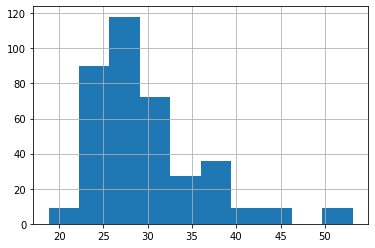

In [28]:
df2['norm_index'].hist()

In [16]:
df2.describe()

,Median_Income,AQ_Max,norm_income,norm_aq_max,norm_index
count,379.000000,379.000000,379.000000,379.000000,379.000000
mean,29476.126649,137.361478,0.675598,0.207066,0.441332
std,6272.785675,47.659437,0.181184,0.094562,0.106236
min,18245.000000,33.000000,0.000000,0.000000,0.024802
25%,25114.000000,115.500000,0.615234,0.163690,0.409449
50%,27877.000000,140.000000,0.721787,0.212302,0.461551
75%,31566.000000,154.500000,0.801594,0.241071,0.508688
max,52866.000000,537.000000,1.000000,1.000000,0.820680


In [19]:
df2.to_csv('cleaned_data/risk_index.csv', encoding='utf-8', index=False)